# Decomposition in Time Series

Decomposition of time series is a statistical technique that deconstructs the time into several components... It can be trend, seasonality, cyclic nature or noise or residual

In [61]:
import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import plotly.express as px

mat.rcParams['figure.figsize'] = (10,8)
mat.rcParams['axes.grid'] = False

In [28]:
def parse(x):
    return datetime.strptime(x, '%m/%d/%Y')

In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/amazon_revenue_profit.csv', 
                parse_dates=['Quarter'], date_parser=parse)
df.head()

,Quarter,Revenue,Net Income
0,2020-03-31,75452,2535
1,2019-12-31,87437,3268
2,2019-09-30,69981,2134
3,2019-06-30,63404,2625
4,2019-03-31,59700,3561


In [30]:
df.shape

(61, 3)

In [31]:
df.columns

Index(['Quarter', 'Revenue', 'Net Income'], dtype='object')

In [32]:
df.isnull().sum()

Quarter       0
Revenue       0
Net Income    0
dtype: int64

In [33]:
amazon_df=df.set_index('Quarter')
amazon_df.head()

,Revenue,Net Income
Quarter,,
2020-03-31,75452,2535
2019-12-31,87437,3268
2019-09-30,69981,2134
2019-06-30,63404,2625
2019-03-31,59700,3561


<AxesSubplot:xlabel='Quarter'>

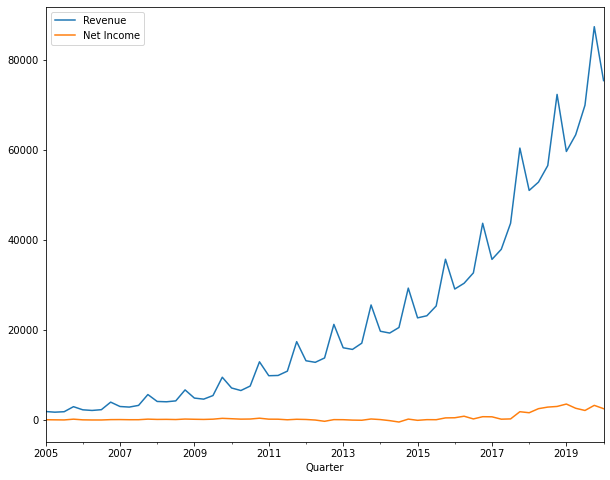

In [42]:
amazon_df.plot()

In [34]:
import plotly.express as px
fig = px.line(df, x='Quarter', y='Revenue', title='Amazon Revenue Slider')

fig.update_xaxes(rangeslider_visible=True,
                 rangeselector=dict(
                 buttons=list([
                     dict(count=1, label="1y", step="year", stepmode="backward"),
                     dict(count=2, label="2y", step="year", stepmode="backward"),
                     dict(count=3, label="3y", step="year", stepmode="backward"),
                     dict(step="all")
                 ])))
fig.show()

#### AR(Auto Regressive) and MA(Moving Averages) models

    ARIMA model is a combo of AR and MA model... this requires Time Series to be stationary but in real nature most of the
    time series data does not have stationary behaviour... they generally do have seasonality or cyclic in nature.
    In order to make all these stationary we try to Decompose the Time Series and make it stationary by taking these
    determinastic components out and make the trend stationary.
    
    Seasonality can be stationary over a mean and in this case there is no trend.
    In the above case it is stationary over the trend of the data

### KPSS Test :

    It helps in determining whether a time series is stationary around a mean or stationary around a trend line
    
**Null Hypothesis : Data is Stationary**

**Alternate Hypothesis : Data is Not Stationary**

In [35]:
from statsmodels.tsa.stattools import kpss
tstest = kpss(amazon_df['Revenue'], 'ct')

d:\anacondafiles\envs\deeplearning\lib\site-packages\statsmodels\tsa\stattools.py:1850: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"



In [36]:
tstest

(0.1700516821083097,
 0.029956931576408573,
 11,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

    The 2.5% value is 0.176 which is greater than 0.05 so, Reject the Null Hypothesis
    and Accept the Alternate Hypothesis.
    
    The 2nd value is 0.0299 which is lesser than 0.05. So the data is not stationary

### Additive = Trend + Cyclic + Stationary + Residual (Noise).... use when data is stationary
### Multiplicative = Trend x Cyclic x Stationary x Residual (Noise)... use when data is non stationary

In [40]:
mat.rcParams['figure.figsize'] = (10,8)
mat.rcParams['axes.grid'] = False

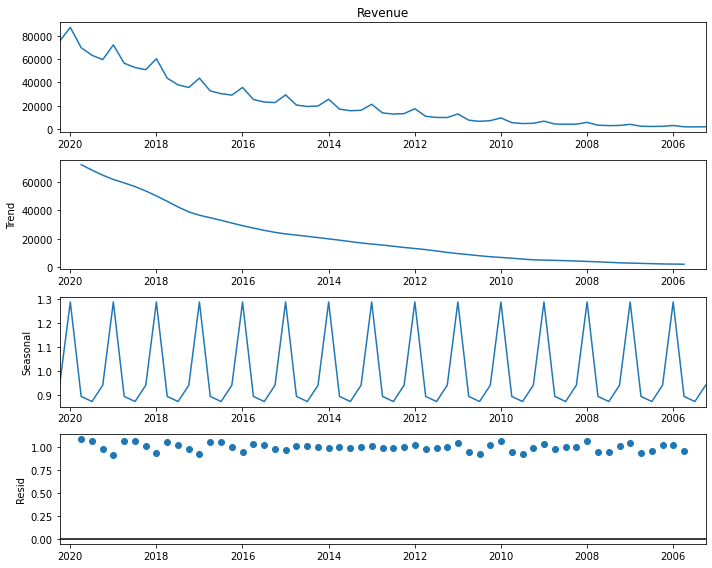

In [43]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(amazon_df['Revenue'],
                               model='multiplicative')


# plt.figure(figsize=(10,5))
resplot=res.plot()


<AxesSubplot:xlabel='Quarter'>

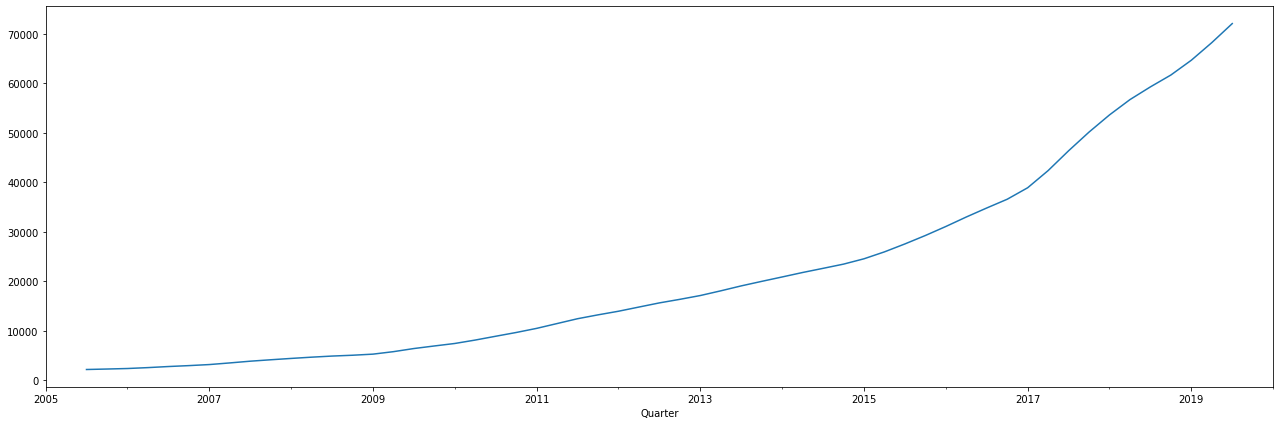

In [44]:
plt.figure(figsize=(22,7))
res.trend.plot()

In [47]:
res.observed # THESE ARE THE OBSERVED VALUES

Quarter
2020-03-31    75452.0
2019-12-31    87437.0
2019-09-30    69981.0
2019-06-30    63404.0
2019-03-31    59700.0
               ...   
2006-03-31     2279.0
2005-12-31     2977.0
2005-09-30     1858.0
2005-06-30     1753.0
2005-03-31     1902.0
Name: Revenue, Length: 61, dtype: float64

In [48]:
res.seasonal # THESE ARE THE SEASONAL VALUES

Quarter
2020-03-31    0.941840
2019-12-31    1.289518
2019-09-30    0.894993
2019-06-30    0.873649
2019-03-31    0.941840
                ...   
2006-03-31    0.941840
2005-12-31    1.289518
2005-09-30    0.894993
2005-06-30    0.873649
2005-03-31    0.941840
Name: seasonal, Length: 61, dtype: float64

In [52]:
res.trend # THIS ARE THE TREND VLAUES

Quarter
2020-03-31          NaN
2019-12-31          NaN
2019-09-30    72099.500
2019-06-30    68248.750
2019-03-31    64691.375
                ...    
2006-03-31     2369.375
2005-12-31     2265.000
2005-09-30     2169.625
2005-06-30          NaN
2005-03-31          NaN
Name: trend, Length: 61, dtype: float64

In [53]:
res.resid # THIS IS THE RESIDUAL VALUE

Quarter
2020-03-31         NaN
2019-12-31         NaN
2019-09-30    1.084496
2019-06-30    1.063372
2019-03-31    0.979831
                ...   
2006-03-31    1.021253
2005-12-31    1.019256
2005-09-30    0.956844
2005-06-30         NaN
2005-03-31         NaN
Name: resid, Length: 61, dtype: float64

In [55]:
# LETS TAKE ONLY 1 SINGLE COMPONENT OF IT THEN MULTIPLY AS PER OUR MENTIONED FORMULA

res.observed[2]

69981.0

In [57]:
res.trend[2]*res.seasonal[2]*res.resid[2]

69980.99999999999

<AxesSubplot:xlabel='Quarter'>

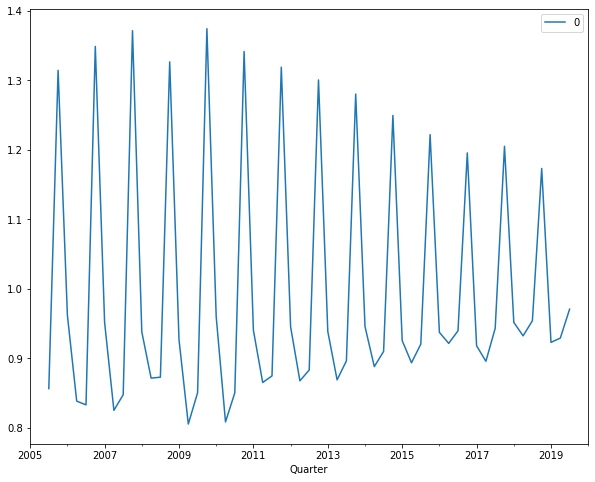

In [60]:
pd.DataFrame(res.observed/res.trend).plot() # THE DATA IS NOW DETREND 

# WE MULTIPLIED THE VALUE IN ORDER TO RE CONSTRUCT IT SO NOW WE ARE MULTIPLYING... SO WE ARE MULTIPLYING IN ORDER TO DE TREND IT
# IF IT WAS AN ADDITIVE MODEL THEN WE NEED TO SUBTRACT IT INSTEAD OF DIVIDING 